# Pstable
Display all possible types of ROOT/Postscript characters.




**Author:** Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:44 AM.</small></i>

In [1]:
void table(Float_t x1, Float_t x2, Float_t yrange, TText *t, const char **symbol, Bool_t octal);

 A helper function is created: 

In [2]:
%%cpp -d
void table(Float_t x1, Float_t x2, Float_t yrange, TText *t,
   const char **symbol, Bool_t octal)
{
   Int_t i;
   Int_t n = 0;
   for (i=0;i<1000;i++) {
      if (!strcmp(symbol[i],"END")) break;
      n++;
   }
   Float_t y1  = 2.5;
   Float_t y2  = yrange - 0.5;
   Float_t dx  = (x2-x1)/5;
   Float_t dy  = (y2 - 1 -y1)/(n+1);
   Float_t y   = y2 - 1 - 0.7*dy;
   Float_t xc0 = x1  + 0.5*dx;
   Float_t xc1 = xc0 + dx;
   Float_t xc2 = xc1 + dx;
   Float_t xc3 = xc2 + dx;
   Float_t xc4 = xc3 + dx;
   TLine *line = new TLine();
   line->DrawLine(x1,y1,x1,y2);
   line->DrawLine(x1,y1,x2,y1);
   line->DrawLine(x1,y2,x2,y2);
   line->DrawLine(x2,y1,x2,y2);
   line->DrawLine(x1,y2-1,x2,y2-1);
   line->DrawLine(x1+  dx,y1,x1+  dx,y2);
   line->DrawLine(x1+2*dx,y1,x1+2*dx,y2);
   line->DrawLine(x1+3*dx,y1,x1+3*dx,y2);
   line->DrawLine(x1+4*dx,y1,x1+4*dx,y2);
   TText *tit = new TText(0,0,"a");
   tit->SetTextSize(0.015);
   tit->SetTextFont(72);
   tit->SetTextAlign(22);
   tit->DrawText(xc0,y2-0.6,"Input");
   tit->DrawText(xc1,y2-0.6,"Roman");
   tit->DrawText(xc2,y2-0.6,"Greek");
   tit->DrawText(xc3,y2-0.6,"Special");
   tit->DrawText(xc4,y2-0.6,"Zapf");
   char text[12];
   for (i=0;i<n;i++) {
      if (octal) {
         unsigned char value = *symbol[i];
         sprintf(text,"@\\ %3o",value);
      } else {
         strcpy(text,symbol[i]);
      }
      t->DrawText(xc0,y,text);
      sprintf(text,"%s",symbol[i]);
      t->DrawText(xc1,y,text);
      sprintf(text,"`%s",symbol[i]);
      t->DrawText(xc2,y,text);
      sprintf(text,"'%s",symbol[i]);
      t->DrawText(xc3,y,text);
      sprintf(text,"~%s",symbol[i]);
      t->DrawText(xc4,y,text);
      y -= dy;
   }
}

In [3]:
const char *symbol1[] =
   {"A","B","C","D","E","F","G","H","I","J","K","L","M","N",
    "O","P","Q","R","S","T","U","V","W","X","Y","Z",
    "0","1","2","3","4","5","6","7","8","9",
    ".",",","+","-","*","/","=","(",")","{","}","END"};

const char *symbol2[] =
   {"a","b","c","d","e","f","g","h","i","j","k","l","m","n",
    "o","p","q","r","s","t","u","v","w","x","y","z",
    ":",";","@","\\","_","|","%",
    "@'","<",">","[","]","\42","@\43","@\136",
    "@\77","@\41","@&","$","@\176"," ","END"};

const char *symbol3[] =
   {"\241","\242","\243","\244","\245","\246","\247","\250",
    "\251","\252","\253","\254","\255","\256","\257","\260",
    "\261","\262","\263","\264","\265","\266","\267","\270",
    "\271","\272","\273","\274","\275","\276","\277","\300",
    "\301","\302","\303","\304","\305","\306","\307","\310",
    "\311","\312","\313","\314","\315","\316","\317","END"};

const char *symbol4[] =
   {"\321","\322","\323","\324","\325","\326","\327","\330",
    "\331","\332","\333","\334","\335","\336","\337","\340",
    "\341","\342","\343","\344","\345","\346","\347","\340",
    "\351","\352","\353","\354","\355","\356","\357","\360",
    "\361","\362","\363","\364","\365","\366","\367","\370",
    "\371","\372","\373","\374","\375","\376","\377","END"};

const char *symbol5[] =
   {"\177","\200","\201","\202","\203","\204","\205","\206",
    "\207","\210","\211","\212","\213","\214","\215","\216",
    "\217","\220","\221","\222","\223","\224","\225","\226",
    "\227","\230","\231","\232","\233","\234","\235","\236",
    "\237","\240","END"};

Float_t xrange = 18;
Float_t yrange = 25;
Int_t w = 650;
Int_t h = w*yrange/xrange;

TCanvas *c1 = new TCanvas("c1","c1",200,10,w,h);
c1->Range(0,0,xrange,yrange);

TText *t = new TText(0,0,"a");
t->SetTextSize(0.02);
t->SetTextFont(62);
t->SetTextAlign(22);

table(0.5,0.5*xrange-0.5,yrange,t,symbol1,0);
table(0.5*xrange+0.5,xrange-0.5,yrange,t,symbol2,0);
TText *tlabel = new TText(0,0,"a");
tlabel->SetTextFont(72);
tlabel->SetTextSize(0.018);
tlabel->SetTextAlign(22);
tlabel->DrawText(0.5*xrange,1.3,
   "Input characters are standard keyboard characters");
c1->Modified();
c1->Update();
c1->Print("pstable1.ps");

TCanvas *c2 = new TCanvas("c2","c2",220,20,w,h);
c2->Range(0,0,xrange,yrange);

table(0.5,0.5*xrange-0.5,yrange,t,symbol3,1);
table(0.5*xrange+0.5,xrange-0.5,yrange,t,symbol4,1);
tlabel->DrawText(0.5*xrange,1.3,
   "Input characters using backslash and octal numbers");
c2->Modified();
c2->Update();
c2->Print("pstable2.ps");

TCanvas *c3 = new TCanvas("c3","c3",240,20,w,h);
c3->Range(0,0,xrange,yrange);

table(0.5,0.5*xrange-0.5,yrange,t,symbol5,1);
tlabel->DrawText(0.5*xrange,1.3,
   "Input characters using backslash and octal numbers");
c3->Modified();
c3->Update();
c3->Print("pstable3.ps");

Info in <TCanvas::Print>: ps file pstable1.ps has been created
Info in <TCanvas::Print>: ps file pstable2.ps has been created
Info in <TCanvas::Print>: ps file pstable3.ps has been created


Draw all canvases 

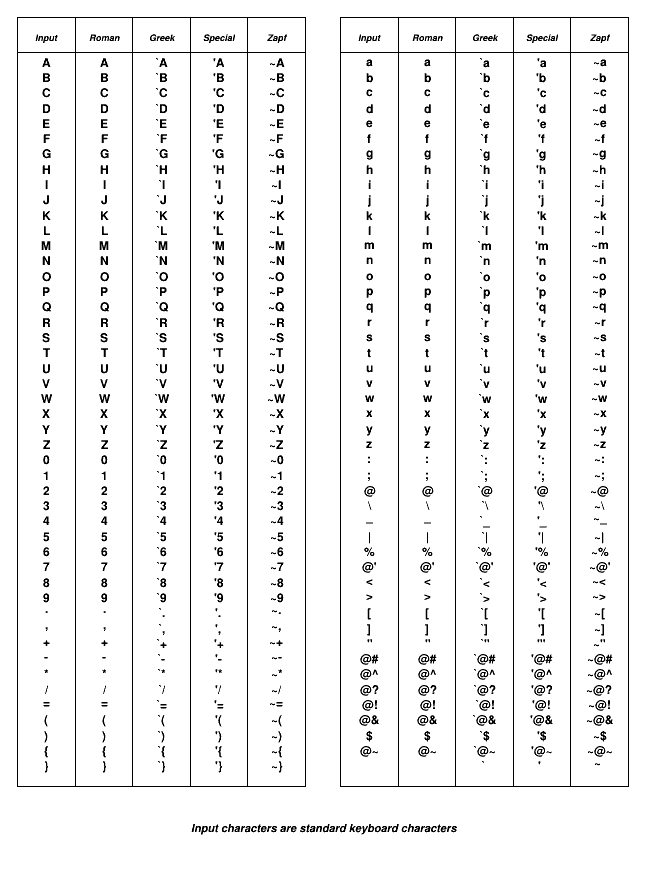

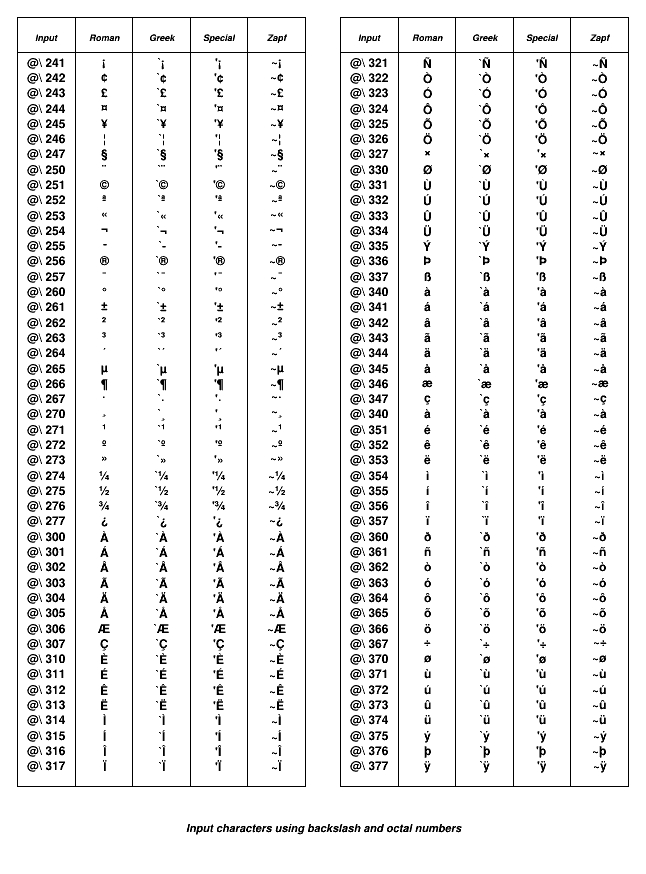

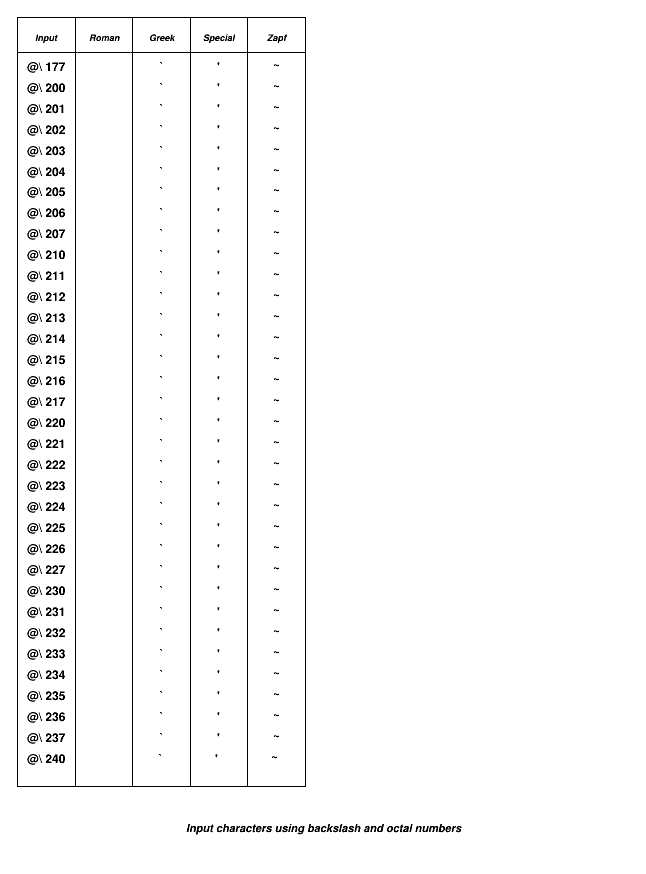

In [4]:
gROOT->GetListOfCanvases()->Draw()